<a href="https://colab.research.google.com/github/Ki-i/APRiL/blob/master/Q3a_mlMse2.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
data = pd.read_csv("/content/drive/My Drive/shumo_data/Q3aData.csv")

In [112]:
data[['高压', '低压']] = data['血压'].str.split('/', expand=True).astype(int)
data.head()  #展示数据集前5个
data['性别'] = data['性别'].replace({'男': 1, '女': 0})
feats = [f for f in data if f not in [ "ID","90天mRS","血压","数据集划分"]]#选择特征
print(feats)

# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 对特征进行最小-最大归一化
data[feats] = scaler.fit_transform(data[feats])

['年龄', '性别', '脑出血前mRS评分', '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', '发病到首次影像检查时间间隔', '脑室引流', '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经', 'HM_volume', 'HM_ACA_R_Ratio', 'HM_MCA_R_Ratio', 'HM_PCA_R_Ratio', 'HM_Pons_Medulla_R_Ratio', 'HM_Cerebellum_R_Ratio', 'HM_ACA_L_Ratio', 'HM_MCA_L_Ratio', 'HM_PCA_L_Ratio', 'HM_Pons_Medulla_L_Ratio', 'HM_Cerebellum_L_Ratio', 'ED_volume', 'ED_ACA_R_Ratio', 'ED_MCA_R_Ratio', 'ED_PCA_R_Ratio', 'ED_Pons_Medulla_R_Ratio', 'ED_Cerebellum_R_Ratio', 'ED_ACA_L_Ratio', 'ED_MCA_L_Ratio', 'ED_PCA_L_Ratio', 'ED_Pons_Medulla_L_Ratio', 'ED_Cerebellum_L_Ratio', '高压', '低压']


In [113]:
# 使用条件索引划分数据
df_train = data[data['数据集划分'] == '训练']
df_test = data[data['数据集划分'] == '测试1']
# df_train.head()
df_test.head()

,ID,90天mRS,数据集划分,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,...,ED_PCA_R_Ratio,ED_Pons_Medulla_R_Ratio,ED_Cerebellum_R_Ratio,ED_ACA_L_Ratio,ED_MCA_L_Ratio,ED_PCA_L_Ratio,ED_Pons_Medulla_L_Ratio,ED_Cerebellum_L_Ratio,高压,低压
100,sub101,NaN,测试1,0.712121,0.0,0.000000,1.0,1.0,1.0,0.0,...,0.173469,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.0,0.871429,0.777778
101,sub102,NaN,测试1,0.606061,1.0,0.333333,1.0,1.0,0.0,0.0,...,0.122449,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.0,0.400000,0.488889
102,sub103,NaN,测试1,0.515152,1.0,1.000000,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.0,0.032967,0.94,0.047619,0.0,0.0,0.300000,0.511111
103,sub104,NaN,测试1,0.181818,1.0,0.000000,1.0,0.0,0.0,0.0,...,0.224490,0.017857,0.0,0.000000,0.00,0.000000,0.0,0.0,0.307143,0.600000
104,sub105,NaN,测试1,0.318182,1.0,0.000000,1.0,1.0,0.0,0.0,...,0.000000,0.000000,0.0,0.879121,0.20,0.000000,0.0,0.0,0.364286,0.455556


In [114]:
# 提取特征列（排除目标列）
X = df_train .drop(columns=["ID","90天mRS","血压","数据集划分"])

# 提取目标列
y = df_train["90天mRS"]

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_test)
print(y_test.size)

83    1.0
53    3.0
70    1.0
45    2.0
44    1.0
39    1.0
22    1.0
80    3.0
10    1.0
0     4.0
18    1.0
30    4.0
73    0.0
33    4.0
90    2.0
4     3.0
76    6.0
77    1.0
12    1.0
31    0.0
Name: 90天mRS, dtype: float64
20


In [101]:
t = list(range(1, num_epochs + 1, step))
# print(len(t))
# print(X)


# 划分数据集为训练集和测试集

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# 将数据转换为PyTorch张量
X_train = torch.Tensor(X_train.values)
y_train = torch.Tensor(y_train.values).view(-1, 1)  # 将目标数据调整为列向量
X_test = torch.Tensor(X_test.values)
y_test = torch.Tensor(y_test.values).view(-1, 1)  # 将目标数据调整为列向量

X_train=torch.reshape(X_train,(X_train.shape[0], 1, X_train.shape[1]))
X_test=torch.reshape(X_test,(X_test.shape[0], 1, X_test.shape[1]))

print(X_train.size())
print(X_test.size())

torch.Size([80, 1, 42])
torch.Size([20, 1, 42])


In [115]:
# 划分数据集为训练集和测试集

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# 将数据转换为PyTorch张量
X_train = torch.Tensor(X_train.values)
y_train = torch.Tensor(y_train.values).view(-1, 1)  # 将目标数据调整为列向量
X_test = torch.Tensor(X_test.values)
y_test = torch.Tensor(y_test.values).view(-1, 1)  # 将目标数据调整为列向量

# 定义CNN模型
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 64, 64)  # 根据输入大小调整线性层的输入大小
        self.fc2 = nn.Linear(64, 1)  # 输出一个连续的回归值

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#两层卷积层，后面接一个全连接层
class D1CNN(nn.Module):
    def __init__(self):
        super(D1CNN, self).__init__()
        self.model1 = nn.Sequential(
        	#输入通道一定为1，输出通道为卷积核的个数，2为卷积核的大小（实际为一个[1,2]大小的卷积核）
            nn.Conv1d(1, 16, 2),
            nn.Sigmoid(),
            nn.MaxPool1d(2),  # 输出大小：torch.Size([128, 16, 5])
            nn.Conv1d(16, 32, 2),
            nn.Sigmoid(),
            nn.MaxPool1d(4),  # 输出大小：torch.Size([128, 32, 1])
            nn.Flatten(),  # 输出大小：torch.Size([128, 32])
        )
        self.model2 = nn.Sequential(
            nn.Linear(in_features=32, out_features=2, bias=True),
            nn.Sigmoid(),
        )
    def forward(self, input):
        x = self.model1(input)
        x = self.model2(x)
        return x


# 定义神经网络模型
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()  # 添加ReLU激活函数
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()  # 添加ReLU激活函数
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(p=0.3)  # dropout训练


    def forward(self, x):
        x = self.fc1(x) # 应用ReLU激活函数
        x = self.dropout(x)
        x = self.relu2(self.fc2(x))  # 应用ReLU激活函数
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        return x

# # 定义神经网络模型
# class Net(nn.Module):
#     def __init__(self, input_size):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(input_size, 64)
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, 1)
#         self.dropout = nn.Dropout(p=0.3)  # dropout训练

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)  # 在回归中，输出层通常不使用激活函数
#         x = self.dropout(x)
#         return x

# 创建模型实例
input_size = X_train.shape[1]
# model = Net(input_size)
# model = CNNModel()
model= D1CNN()
# 定义均方误差损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 10000
num_plot=100
train_plot=[]
dev_plot=[]
step=int(num_epochs/num_plot)
for epoch in range(num_epochs):
    print(X_train.size())
    # 前向传播
    outputs = model(X_train)
    print(X_train.size())
    loss = criterion(outputs, y_train)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 测试模型
    model.eval()
    print("1")
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
    print(f'Epoch [{epoch + 1}/{num_epochs}], train_Loss: {loss.item()},test_Loss:{test_loss.item()}')
    if epoch%step==0:
      train_plot.append(loss.item())
      dev_plot.append(test_loss.item())
    # print(f'Test Mean Squared Error (MSE): {test_loss.item()}')

t = list(range(1, num_epochs + 1, step))
plt.title('mse')
plt.plot(t, train_plot, color='red', label='train mse')
plt.plot(t, dev_plot, color='blue', label='dev mse')
plt.legend()
plt.ylim(0,10)
plt.show()



torch.Size([80, 42])


RuntimeError: ignored

#### 神经网络


流式输出内容被截断，只能显示最后 5000 行内容。
torch.Size([80, 42])
Epoch [7501/10000], train_Loss: 4.816608223379149e-10,test_Loss:2.5262067317962646
torch.Size([80, 42])
Epoch [7502/10000], train_Loss: 4.6318210378260005e-10,test_Loss:2.5262045860290527
torch.Size([80, 42])
Epoch [7503/10000], train_Loss: 4.456725544166318e-10,test_Loss:2.5262036323547363
torch.Size([80, 42])
Epoch [7504/10000], train_Loss: 4.280618914886958e-10,test_Loss:2.52620005607605
torch.Size([80, 42])
Epoch [7505/10000], train_Loss: 4.1402731243422863e-10,test_Loss:2.526197671890259
torch.Size([80, 42])
Epoch [7506/10000], train_Loss: 3.977446705327736e-10,test_Loss:2.526196241378784
torch.Size([80, 42])
Epoch [7507/10000], train_Loss: 3.804763726300564e-10,test_Loss:2.5261952877044678
torch.Size([80, 42])
Epoch [7508/10000], train_Loss: 3.6546946025062255e-10,test_Loss:2.526193141937256
torch.Size([80, 42])
Epoch [7509/10000], train_Loss: 3.497006573205397e-10,test_Loss:2.5261905193328857
torch.Size([80, 42])
Epoch [7510/10000]

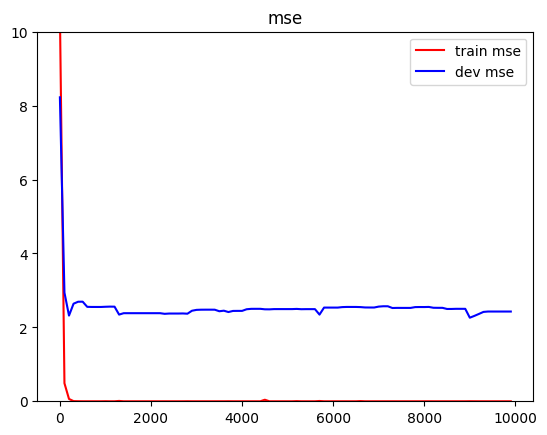

In [119]:
# 划分数据集为训练集和测试集

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# 将数据转换为PyTorch张量
X_train = torch.Tensor(X_train.values)
y_train = torch.Tensor(y_train.values).view(-1, 1)  # 将目标数据调整为列向量
X_test = torch.Tensor(X_test.values)
y_test = torch.Tensor(y_test.values).view(-1, 1)  # 将目标数据调整为列向量

# 定义CNN模型
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 64, 64)  # 根据输入大小调整线性层的输入大小
        self.fc2 = nn.Linear(64, 1)  # 输出一个连续的回归值

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# # 定义神经网络模型
# class Net(nn.Module):
#     def __init__(self, input_size):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(input_size, 64)
#         self.relu1 = nn.ReLU()  # 添加ReLU激活函数
#         self.fc2 = nn.Linear(64, 32)
#         self.relu2 = nn.ReLU()  # 添加ReLU激活函数
#         self.fc3 = nn.Linear(32, 1)
#         self.dropout = nn.Dropout(p=0.3)  # dropout训练


#     def forward(self, x):
#         x = self.fc1(x) # 应用ReLU激活函数
#         x = self.dropout(x)
#         x = self.relu2(self.fc2(x))  # 应用ReLU激活函数
#         x = self.dropout(x)
#         x = self.fc3(x)
#         x = self.dropout(x)
#         return x

# 定义神经网络模型
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(p=0.3)  # dropout训练

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # 在回归中，输出层通常不使用激活函数
        x = self.dropout(x)
        return x

# 创建模型实例
input_size = X_train.shape[1]
model = Net(input_size)
# model = CNNModel()

# 定义均方误差损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 10000
num_plot=100
train_plot=[]
dev_plot=[]
step=int(num_epochs/num_plot)
for epoch in range(num_epochs):
    print(X_train.size())
    # 前向传播
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 测试模型
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
    print(f'Epoch [{epoch + 1}/{num_epochs}], train_Loss: {loss.item()},test_Loss:{test_loss.item()}')
    if epoch%step==0:
      train_plot.append(loss.item())
      dev_plot.append(test_loss.item())
    # print(f'Test Mean Squared Error (MSE): {test_loss.item()}')

t = list(range(1, num_epochs + 1, step))
plt.title('mse')
plt.plot(t, train_plot, color='red', label='train mse')
plt.plot(t, dev_plot, color='blue', label='dev mse')
plt.legend()
plt.ylim(0,10)
plt.show()



In [55]:
print(dev_plot)

[14555528.0, 173109.1875, 76168.03125, 29948.806640625, 8589.5595703125, 2638.425537109375, 1654.9788818359375, 717.1921997070312, 458.5187072753906, 367.20068359375, 304.4831848144531, 288.59722900390625, 274.01495361328125, 263.7897033691406, 255.0748748779297, 245.58154296875, 237.83261108398438, 230.21255493164062, 223.54373168945312, 217.6713104248047, 212.16732788085938, 207.21591186523438, 202.74966430664062, 198.65478515625, 194.9128875732422, 191.43751525878906, 188.15933227539062, 185.11720275878906, 182.42453002929688, 179.930908203125, 177.5941619873047, 175.4064483642578, 173.32357788085938, 171.25523376464844, 169.3544464111328, 167.8666534423828, 167.20968627929688, 166.67562866210938, 167.2655029296875, 168.36402893066406, 168.9976348876953, 169.02359008789062, 168.5924072265625, 167.89549255371094, 167.03884887695312, 166.19561767578125, 165.4131317138672, 164.68319702148438, 164.0052032470703, 163.36550903320312, 162.74501037597656, 162.14053344726562, 161.55233764648

In [53]:
print(train_plot)

[268339.78125, 493039.5625, 53700.2265625, 37000.6171875, 12740.8876953125, 4199.96142578125, 1431.60546875, 576.1301879882812, 192.1226806640625, 78.60606384277344, 38.97517776489258, 19.69007682800293, 14.177583694458008, 12.247934341430664, 10.952315330505371, 9.967523574829102, 8.959409713745117, 8.136252403259277, 7.478572845458984, 6.938460350036621, 6.492982387542725, 6.127853870391846, 5.8306684494018555, 5.586463451385498, 5.384247303009033, 5.209819316864014, 5.059847354888916, 4.928833961486816, 4.766226768493652, 4.60635232925415, 4.4631781578063965, 4.339550971984863, 4.229368686676025, 4.110690116882324, 3.993617296218872, 3.875629425048828, 3.7701072692871094, 3.6736724376678467, 3.6075024604797363, 3.555830717086792, 3.5133235454559326, 3.476522445678711, 3.4435126781463623, 3.4132347106933594, 3.383958339691162, 3.35683012008667, 3.3317809104919434, 3.3083863258361816, 3.2863357067108154, 3.265479326248169, 3.2467846870422363, 3.229179859161377, 3.212366819381714, 3.19

In [20]:
test_outputs

tensor([[ 1.1013],
        [ 1.9285],
        [ 2.7023],
        [ 2.5839],
        [ 0.2606],
        [-2.7002],
        [ 2.7023],
        [ 4.7595],
        [ 1.8779],
        [ 2.7023],
        [13.4137],
        [ 2.6441],
        [ 2.7023],
        [ 2.3672],
        [ 0.2155],
        [ 2.7023],
        [20.8173],
        [ 3.5201],
        [ 4.6199],
        [ 2.2991]])

In [15]:
y_test

tensor([[1.],
        [3.],
        [1.],
        [2.],
        [1.],
        [1.],
        [1.],
        [3.],
        [1.],
        [4.],
        [1.],
        [4.],
        [0.],
        [4.],
        [2.],
        [3.],
        [6.],
        [1.],
        [1.],
        [0.]])

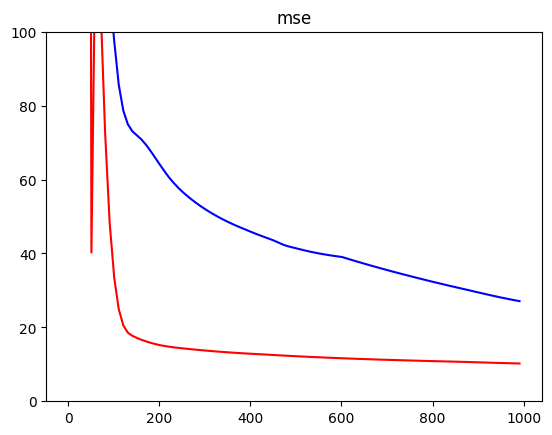

In [60]:
t = list(range(1, num_epochs + 1, step))
plt.title('mse')
plt.plot(t, train_plot, color='red', label='train mse')
plt.plot(t, dev_plot, color='blue', label='dev mse')
plt.ylim(0,100)
plt.show()